In [1]:
pip install scikit-learn-extra

     -------------------------------------- 813.5/813.5 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 14.6/14.6 MB 492.1 kB/s eta 0:00:00
     ---------------------------------------- 7.4/7.4 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 38.6/38.6 MB 1.0 MB/s eta 0:00:00
     ------------------------------------ 307.0/307.0 kB 862.5 kB/s eta 0:00:00
Failed to build scikit-learn-extra
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [49 lines of output]
  C:\Users\ABC\AppData\Local\Temp\pip-build-env-jjlt72lk\overlay\Lib\site-packages\setuptools\dist.py:771: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
    warnings.warn(
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\benchmarks
  copying benchmarks\bench_rbfsampler_fastfood.py -> build\lib.win-amd64-cpython-310\benchmarks
  copying benchmarks\__init__.py -> build\lib.win-amd64-cpython-310\benchmarks
  creating build\lib.win-amd64-cpython-310\sklearn_extra
  copying sklearn_extra\_version.py -> build\lib.win-amd64-cpython-310\sklearn_extra
  copying sklearn_extra\__init__.py -> build\lib.win-amd64-cpython-310\sklearn_extra
  creating build\lib.win-amd64-cpython-310\benchmarks\_bench
  

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ef1 = pd.read_csv('/content/sample_data/Country-data.csv')

In [ ]:
ef1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
ef1.size

1670

In [ ]:
ef1.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
n = len(pd.unique(ef1['country']))
  
print("No.of unique values :", 
      n)

No.of unique values : 167


In [ ]:
ef3 = ef1.drop(['country'],axis=1)

In [ ]:
ef3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters,KMedoids_Clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0


In [ ]:
def scale_data():
  scaler=MinMaxScaler()
  for x in ef3.columns[0:9]:
    scaler.fit(np.array(ef3[x]).reshape(-1,1))
    ef3[x]=scaler.transform(np.array(ef3[x]).reshape(-1,1))
    ef3[x].round(2)
scale_data()


In [ ]:
ef3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters,KMedoids_Clusters
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,2,1
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0,0
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0,0
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,2,1
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0,0


In [ ]:
#converting the 9 dimentional data to 2 dimensinal data using pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(ef3)
cf_after_pca = pd.DataFrame(data = principalComponents , columns = ['x', 'y'])
pca_medoid=pd.DataFrame(cf_after_pca)

In [ ]:
kmeans = KMeans(n_clusters = 3,random_state=111)
kmeans.fit(cf_after_pca)

KMeans(n_clusters=3, random_state=111)

In [ ]:
pd.Series(kmeans.labels_).value_counts()

2    83
1    46
0    38
dtype: int64

In [ ]:
metrics.silhouette_score(cf_after_pca, kmeans.labels_)

0.801442241833603

In [ ]:
#cluster_labels = kmeans.fit_predict(ef3)

In [ ]:
preds = kmeans.labels_
ef3 = pd.DataFrame(ef1)
data_after_pca_clus=pd.DataFrame(cf_after_pca)
ef3['KMeans_Clusters'] = preds
data_after_pca_clus['KMeans_clusters']=preds
ef3.head(10)
data_after_pca_clus.head()

,x,y,KMeans_clusters
0,-0.599078,0.095490,2
1,0.158474,-0.212092,0
2,0.003686,-0.135867,0
3,-0.650235,0.275975,2
4,0.200711,-0.064662,0


In [ ]:
#ef3.to_csv('kmeans_result.csv',index=False)

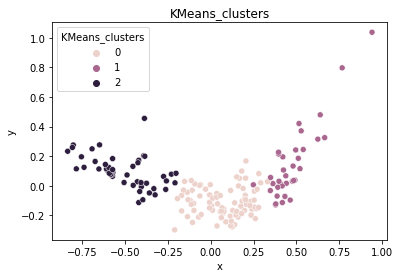

In [ ]:
sns.scatterplot(data_after_pca_clus['x'],data_after_pca_clus['y'],hue='KMeans_clusters',data=data_after_pca_clus) 
plt.title("KMeans_clusters", fontsize=12)
plt.xlabel("x", fontsize=10)
plt.ylabel("y", fontsize=10)
plt.show()

In [ ]:
under_developing= ef1[ef3['KMeans_Clusters']==2]['country']
developing=ef1[ef3['KMeans_Clusters']==0]['country']
developed=ef1[ef3['KMeans_Clusters']==1]['country']

print("Number of deveoped countries",len(under_developing))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(developed))

Number of deveoped countries 46
Number of developing countries 86
Number of under-developing countries 35


In [ ]:
list(developed)

['Australia',
 'Austria',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [ ]:
list(developing)

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'South Africa',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Thailand',
 'Tonga',
 'Tunisia',
 'Turkey',
 'Turkm

In [ ]:
list(under_developing)

['Afghanistan',
 'Angola',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [ ]:
kmedoids = KMedoids(n_clusters = 3,)
kmedoids.fit(pca_medoid)

KMedoids(n_clusters=3)

In [ ]:
pd.Series(kmedoids.labels_).value_counts()

0    80
1    46
2    41
dtype: int64

In [ ]:
metrics.silhouette_score(pca_medoid, kmedoids.labels_)

0.6510224017115877

In [ ]:
preds1 = kmedoids.labels_
kmedoid_cl = pd.DataFrame(ef1)
cf_after_pca_cl = pd.DataFrame(pca_medoid)
kmedoid_cl['KMedoids_Clusters'] = preds1
cf_after_pca_cl['KMedoid_Clusters'] = preds1
cf_after_pca_cl.head()

,x,y,KMedoid_Clusters
0,1.362574,-0.244117,1
1,-0.796982,-0.082674,0
2,-0.749331,-0.208061,0
3,1.379068,-0.282558,1
4,-0.793888,-0.008144,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


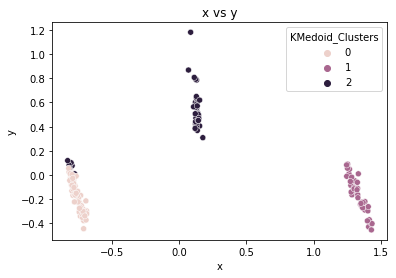

In [ ]:
sns.scatterplot(cf_after_pca_cl['x'],cf_after_pca_cl['y'],hue='KMedoid_Clusters',data=cf_after_pca_cl) 
plt.title("x vs y", fontsize=12)
plt.xlabel("x", fontsize=10)
plt.ylabel("y", fontsize=10)
plt.show()

In [ ]:
under_developing= kmedoid_cl[kmedoid_cl['KMedoids_Clusters']==1]['country']
developing=kmedoid_cl[kmedoid_cl['KMedoids_Clusters']==0]['country']
developed=kmedoid_cl[kmedoid_cl['KMedoids_Clusters']==2]['country']

print("Number of deveoped countries",len(under_developing))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(developed))

Number of deveoped countries 46
Number of developing countries 80
Number of under-developing countries 41


In [ ]:
list(developed)

['Australia',
 'Austria',
 'Bahamas',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [ ]:
list(developing)

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'South Africa',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Thailand',
 'Tonga',
 'Tunisia',
 'Turkey',
 'Turkm

In [ ]:
list(under_developing)

['Afghanistan',
 'Angola',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']